# Credit Fraud detection

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**import library to notebook**
   - numpy : the libaray for managing data to array
   - pandas : the library for managing data to dataframe
   - seaborn, matplotlib for data visualiation
   - os for operate files path

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,precision_score,recall_score
from imblearn.under_sampling import NearMiss
%matplotlib inline

#### read csv file to Dataframe
This file is the [credit cards](https://www.kaggle.com/mlg-ulb/creditcardfraud) information form Kaggle.

It avaiale for Data scientist for extend the knowledge

In [2]:
df = pd.read_csv("../data/credit/creditcard.csv")

### Explore the information of data
**basic to explore**
- Are there the missing values?
- What kind of data in each columns?
- Basic statistic for evaluate or vitualization information (Std,Variance,mean,etc)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### How many fraud data in this information
Before we get start to analyze this information. I try to observe number count of both Fraud and Not Fraud

In [6]:
fraud_count=pd.value_counts(df['Class'])
print(fraud_count)

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

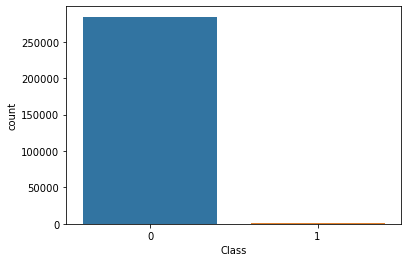

In [7]:
sns.countplot(df['Class'])

### What is Imbalance classification 

It involed the predictive model which distribution of each class aren't equal<br>
This results in models that have poor predictive performance,
speciacally for the minority class<br>
<br>
### Causes of Class Imbalance 
<br>
The imbalance of the class distribution in an imbalanced classication predictive modeling
problem may have many causes. There are perhaps two main groups of causes for the imbalance
we may want to consider; they are data sampling and properties of the domain. It is possible
that the imbalance in the examples across the classes was caused by the way the examples were
collected or sampled from the problem domain. This might involve biases introduced during
data collection, and errors made during data collection.

- Bias sampling
- Measurement Error


In [8]:
print('Fraud class is:',fraud_count[1])
print("There are no fraud ",(fraud_count[0]/(fraud_count[0]+fraud_count[1]))*100,"% of data set")

Fraud class is: 492
There are no fraud  99.82725143693798 % of data set


### The problem about this information 
the different between number of **fraud** and **non fraud** ( It about **99.8%** )

So, I would like to try this data without clean

#### Scaling the data

In [11]:
def scaler_func(df):
    scaler = StandardScaler().fit(df[['Time','Amount']])
    scale_df = pd.DataFrame(scaler.transform(df[['Time','Amount']]),columns=['scale_Time','scale_Amount'])
    df = pd.concat([df,scale_df['scale_Amount']],axis=1)
    df = df.drop(columns=['Time','Amount'])
    return df

In [6]:
#import nesseray libraly for scaler
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[['Time','Amount']])
scale_df = pd.DataFrame(scaler.transform(df[['Time','Amount']]),columns=['scale_Time','scale_Amount'])
df = pd.concat([df,scale_df['scale_Amount']],axis=1)
df = df.drop(columns=['Time','Amount'])

In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scale_Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727,2.913952e-17
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,precision_score,recall_score
from sklearn.pipeline import Pipeline

In [9]:
X = df.drop(columns='Class')
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 1)

In [39]:
lg_model = LogisticRegression(solver = 'lbfgs')
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)

In [53]:
print("accurancy score is : ",accuracy_score(y_test,y_pred))
print("roc auc score is : ",roc_auc_score(y_test,y_pred))
print("precision score is ",precision_score(y_test,y_pred))
print("recall score is ",recall_score(y_test,y_pred))
print("The accurancy is Bias with Majority class")

accurancy score is :  0.9991573255620024
roc auc score is :  0.7982947785312294
precision score is  0.8409090909090909
recall score is  0.5967741935483871
The accurancy is Bias with Majority class


## resampling by deleting majority class to equal

Basicaly, The simplest way to make balance of Data is random delete majority data to equal as minority daata

In [54]:
fraud_class = df[df['Class'] == 1]
no_fraud_class = df[df['Class'] == 0].iloc[:len(df[df['Class'] == 1])]
new_df = pd.concat((fraud_class,no_fraud_class),axis=0)
new_df = new_df.sample(frac=1.0,replace=True,random_state=1)

<AxesSubplot:xlabel='Class', ylabel='count'>

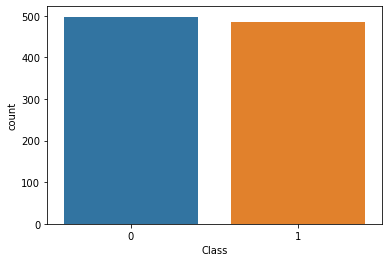

In [55]:
sns.countplot(new_df['Class'])

In [56]:
X2 = new_df.drop(columns='Class')
y2 = new_df['Class']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.4,random_state = 1)

In [57]:
lg2_model = LogisticRegression(solver='lbfgs')
lg2_model.fit(X_train2,y_train2)
y_prob  = lg2_model.predict_proba(X_test2)
y_pred2 = lg2_model.predict(X_test2)

In [58]:
# The accurancy is improved
print(accuracy_score(y_test2,y_pred2))

0.9543147208121827


In [59]:
print(confusion_matrix(y_test2,y_pred2))

[[193  10]
 [  8 183]]


In [60]:
fpr,tpr,thredhold = roc_curve(y_test2,y_prob[:,1])

Text(0, 0.5, 'true positive rate')

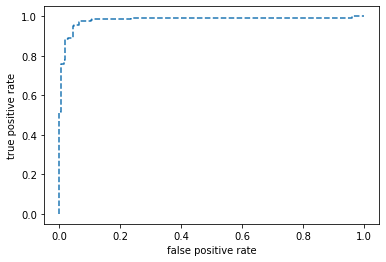

In [61]:
plt.plot(fpr,tpr,linestyle = '--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [62]:
print("accurancy score is : ",accuracy_score(y_test2,y_pred2))
print("roc auc score is : ",roc_auc_score(y_test2,y_pred2))
print("precision score is ",precision_score(y_test2,y_pred2))
print("recall score is ",recall_score(y_test2,y_pred2))
print("The accurancy is Bias with Majority class")

accurancy score is :  0.9543147208121827
roc auc score is :  0.9544270497511154
precision score is  0.9481865284974094
recall score is  0.9581151832460733
The accurancy is Bias with Majority class


## Resampling by SMOTE

The SMOTE method is undersampling method that create sythetic minority data by using K-nearest. 
the technique will undersample the majority class to have the same number of
examples as the minority class

In [10]:
over_sampling = SMOTE(k_neighbors=3)
X_new,y_new = over_sampling.fit_resample(X,y)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_new,y_new,test_size = 0.33)

In [12]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train3,y_train3)
y_pred3 = lr.predict(X_test3)
print("accurancy score is : ",accuracy_score(y_test3,y_pred3))
print("roc auc score is : ",roc_auc_score(y_test3,y_pred3))
print("precision score is ",precision_score(y_test3,y_pred3))
print("recall score is ",recall_score(y_test3,y_pred3))

accurancy score is :  0.9466554399727148
roc auc score is :  0.9466504582685732
precision score is  0.9743569423059506
recall score is  0.9174377451816477


## Resampling by Nearmiss

Another resampling method is Near miss. These method are subset of undersampling by using average distance from minority class

In [15]:
from imblearn.under_sampling import NearMiss
under_sampling = NearMiss(version = 3,n_neighbors_ver3=3)

In [16]:
X_new1,y_new1= over_sampling.fit_resample(X,y)
X_train4,X_test4,y_train4,y_test4 = train_test_split(X_new1,y_new1,test_size = 0.33)
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train4,y_train4)
y_pred4 = lr.predict(X_test4)
print("accurancy score is : ",accuracy_score(y_test4,y_pred4))
print("roc auc score is : ",roc_auc_score(y_test4,y_pred4))
print("precision score is ",precision_score(y_test4,y_pred4))
print("recall score is ",recall_score(y_test4,y_pred4))

accurancy score is :  0.9459679826057299
roc auc score is :  0.9459183484307875
precision score is  0.9743435398873341
recall score is  0.9158739817869306


## Make machine learning pipeline

In [15]:
def load_data():
    data = pd.read_csv("../data/credit/creditcard.csv")    
    return data

In [21]:
def scaler_func(df):
    scaler = StandardScaler().fit(df[['Time','Amount']])
    scale_df = pd.DataFrame(scaler.transform(df[['Time','Amount']]),columns=['scale_Time','scale_Amount'])
    df = pd.concat([df,scale_df['scale_Amount']],axis=1)
    df = df.drop(columns=['Time','Amount'])
    return data

In [22]:
def resampling(df):
    under_sampling = NearMiss(version = 3,n_neighbors_ver3=3)
    X,y = under_sampling.fit_resample(df.drop(columns='Class'),df['Class'])
    return X,y